In [1]:
#Подключение библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import simplefilter

simplefilter('ignore')

In [2]:
wine_dataset = pd.read_csv('wine.csv', encoding='latin-1') 

In [3]:
wine_dataset

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
wine_dataset

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
print('Количество пропущенных значений')
wine_dataset.isnull().sum()

Количество пропущенных значений


class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<AxesSubplot:xlabel='Alcohol'>

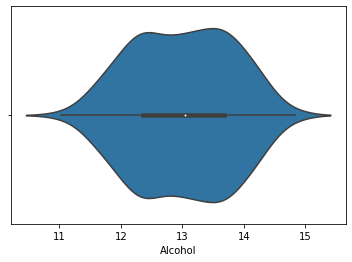

In [9]:
sns.violinplot(x=wine_dataset['Alcohol'])

In [10]:
wine_dataset.corr()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [12]:
#разделение выборки
from sklearn.model_selection import train_test_split
y = wine_dataset['Alcohol']
X = wine_dataset.drop('Alcohol', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train

,class,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
126,2,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
101,2,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
86,2,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
87,2,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
57,1,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,1,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
0,1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
131,3,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
152,3,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425


In [14]:
y_train

126    12.43
101    12.60
86     12.16
87     11.65
57     13.29
       ...  
21     12.93
0      14.23
131    12.88
152    13.11
106    12.25
Name: Alcohol, Length: 124, dtype: float64

In [15]:
#Обучение KNN с производным k

simplefilter('ignore')

def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    
def print_cv_result(cv_model, x_test, y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(y_test, cv_model.predict(x_test))
    print()
base_k = 7
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(x_train, y_train)
y_pred_base = base_knn.predict(x_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(y_test, y_pred_base)

Test metrics for KNN with k=7

R^2: 0.4114734478484322
MSE: 0.41318915343915374
MAE: 0.5182804232804235


In [17]:
#Кросс валидация
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(x_train, y_train)
        print_cv_result(knn_cv, x_test, y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.2896769561099909
Лучший параметр: {'n_neighbors': 21}
Метрики на тестовом наборе
R^2: 0.40176544092364697
MSE: 0.42000489208028885
MAE: 0.507557319223986

Оптимизация метрики neg_mean_squared_error: -0.41685570045351483
Лучший параметр: {'n_neighbors': 21}
Метрики на тестовом наборе
R^2: 0.40176544092364697
MSE: 0.42000489208028885
MAE: 0.507557319223986

Оптимизация метрики neg_mean_absolute_error: -0.5107313333333333
Лучший параметр: {'n_neighbors': 20}
Метрики на тестовом наборе
R^2: 0.38259136095702373
MSE: 0.43346651388888885
MAE: 0.5160648148148149

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.2673006449204842
Лучший параметр: {'n_neighbors': 14}
Метрики на тестовом наборе
R^2: 0.4137699722559509
MSE: 0.41157682350718044
MAE: 0.5031613756613756

Оптимизация метрики neg_mean_squared_error: -0.4125264812660562
Лучший параметр: {'n_neighbors': 23}
Метрики на тестовом наборе
R^2: 0.40695209481886485
MSE

In [18]:
best_k = 9
y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train).predict(x_test)

In [19]:
#Сравнение исходной и оптимальной модели
print('Исходная модель\n')
print_metrics(y_test, y_pred_base)
print('\nОптимальная модель\n')
print_metrics(y_test, y_pred_best)

Исходная модель

R^2: 0.4114734478484322
MSE: 0.41318915343915374
MAE: 0.5182804232804235

Оптимальная модель

R^2: 0.3538435051366853
MSE: 0.45364963420210347
MAE: 0.5257407407407408


In [20]:
#Визуализация результатов
res = pd.DataFrame({'y_test': y_test, 'y_pred_best': y_pred_best}).sort_values(by='y_test')
res.head()

,y_test,y_pred_best
115,11.03,12.314444
109,11.61,13.066667
88,11.64,13.066667
112,11.76,12.821111
84,11.84,12.772222
